In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Datset/diabetes_prediction_dataset.csv')
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data.shape

(100000, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
data.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [ ]:
data.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [ ]:
data.isnull().sum().sum()

0

In [ ]:
print(data.columns)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')


In [ ]:
data['gender_encoded'] = np.where(data['gender'] == 'Female', 1, 0)
data.drop(columns=['gender'], inplace=True)
data.drop(columns=['smoking_history'], inplace=True)
data.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_encoded
0,80.0,0,1,25.19,6.6,140,0,1
1,54.0,0,0,27.32,6.6,80,0,1
2,28.0,0,0,27.32,5.7,158,0,0
3,36.0,0,0,23.45,5.0,155,0,1
4,76.0,1,1,20.14,4.8,155,0,0


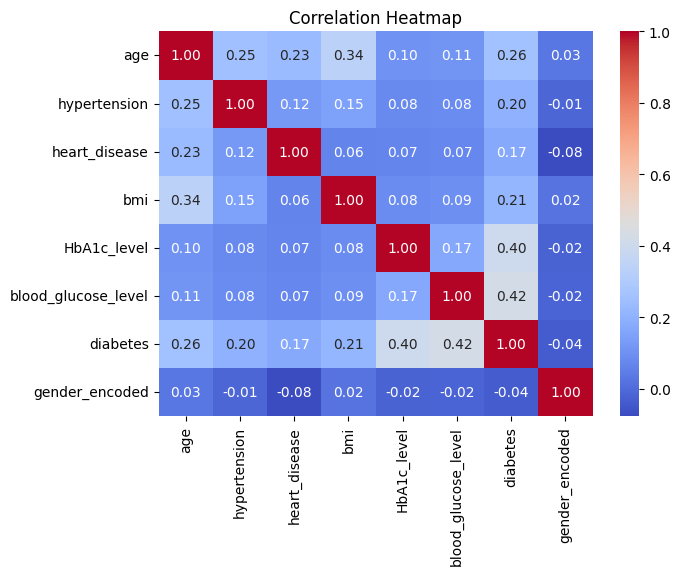

In [ ]:
correlation_matrix = data.corr()


plt.figure(figsize=(7,5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
X=data.drop(columns=['diabetes'], axis=1)
Y=data['diabetes']

In [ ]:
X

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_encoded
0,80.0,0,1,25.19,6.6,140,1
1,54.0,0,0,27.32,6.6,80,1
2,28.0,0,0,27.32,5.7,158,0
3,36.0,0,0,23.45,5.0,155,1
4,76.0,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...
99995,80.0,0,0,27.32,6.2,90,1
99996,2.0,0,0,17.37,6.5,100,1
99997,66.0,0,0,27.83,5.7,155,0
99998,24.0,0,0,35.42,4.0,100,1


In [ ]:
Y

,diabetes
0,0
1,0
2,0
3,0
4,0
...,...
99995,0
99996,0
99997,0
99998,0


In [ ]:
print(data.columns)

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes', 'gender_encoded'],
      dtype='object')


In [ ]:
# data['gender'] = data['gender'].str.lower().str.strip().map(lambda x: 0 if x == 'male' else (1 if x == 'female' else np.nan))
# data.head()

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [ ]:
model=LogisticRegression(max_iter=6000, solver='saga')

In [ ]:
model.fit(X_train,Y_train)

LogisticRegression(max_iter=6000, solver='saga')

In [ ]:
X_train_predict=model.predict(X_train)
accuracy_score(X_train_predict,Y_train)

0.9601125

In [ ]:
X_test_precit=model.predict(X_test)
accuracy_score(X_test_precit,Y_test)

0.9577

In [ ]:
X

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_encoded
0,80.0,0,1,25.19,6.6,140,1
1,54.0,0,0,27.32,6.6,80,1
2,28.0,0,0,27.32,5.7,158,0
3,36.0,0,0,23.45,5.0,155,1
4,76.0,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...
99995,80.0,0,0,27.32,6.2,90,1
99996,2.0,0,0,17.37,6.5,100,1
99997,66.0,0,0,27.83,5.7,155,0
99998,24.0,0,0,35.42,4.0,100,1


In [ ]:

input_data = {
    'age': 44.0,
    'hypertension': 0,
    'heart_disease': 0,
    'bmi': 19.31,
    'HbA1c_level': 6.5,
    'blood_glucose_level': 200,
    'gender_encoded': 1
}

# Convert dictionary to DataFrame
input_data_as_dataframe = pd.DataFrame([input_data])



# Make prediction
prediction = model.predict(input_data_as_dataframe)

# Print result based on prediction
if prediction[0] == 0:
    print('The Person is not a diabetic patient')
else:
    print('The Person is a diabetic patient')


The Person is not a diabetic patient


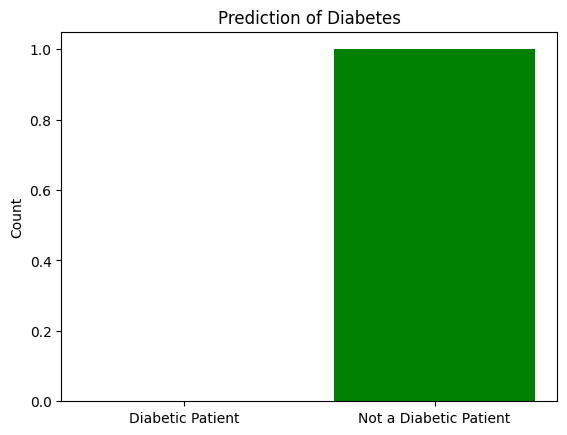

In [ ]:
labels = ['Diabetic Patient', 'Not a Diabetic Patient']
sizes = [1 if prediction[0] == 1 else 0, 1 if prediction[0] == 0 else 0]
colors = ['red', 'green']

plt.bar(labels, sizes, color=colors)
plt.title("Prediction of Diabetes")
plt.ylabel("Count")
plt.show()

In [ ]:
X_train_predict=model.predict(X_train)
precision_score(X_train_predict,Y_train)

0.5948174322732627

In [ ]:
X_test_predict=model.predict(X_test)
precision_score(X_test_predict,Y_test)

0.5737704918032787